In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('penguins_binary_classification.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [38]:
print(df.shape)
print(df.info())

(274, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB
None


In [39]:
print(df['species'].unique())
print(df['island'].unique())

['Adelie' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [40]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['species'])
df['species'] = label_encoder.transform(df['species'])
print(df['species'].unique())
label_encoder.fit(df['island'])
df['island'] = label_encoder.transform(df['island'])
print(df['island'].unique())
df.head()

[0 1]
[2 0 1]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0,2,39.1,18.7,181.0,3750.0,2007
1,0,2,39.5,17.4,186.0,3800.0,2007
2,0,2,40.3,18.0,195.0,3250.0,2007
3,0,2,36.7,19.3,193.0,3450.0,2007
4,0,2,39.3,20.6,190.0,3650.0,2007


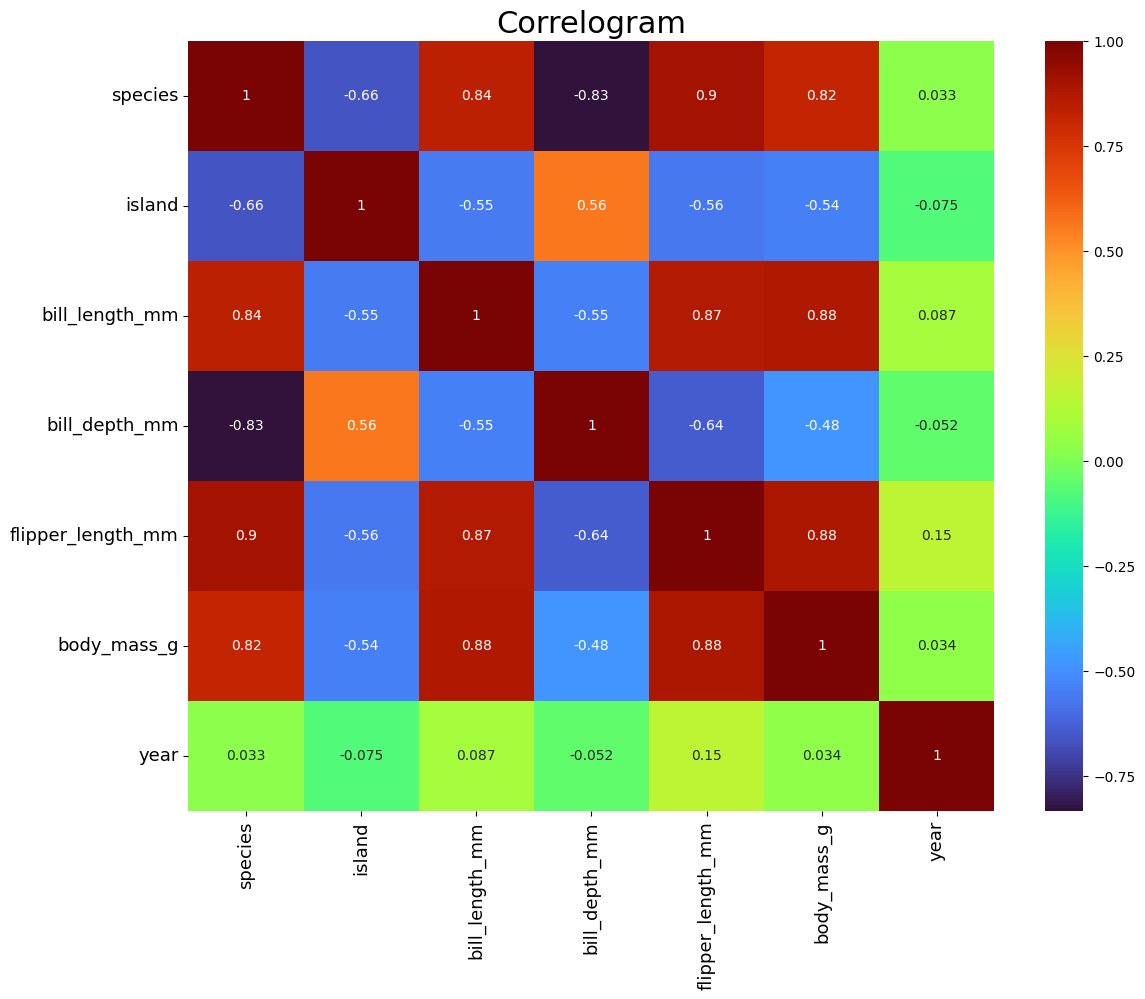

In [46]:
df.corr(numeric_only=True)

plt.figure(figsize=(13,10))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap="turbo", annot=True)
plt.title('Correlogram', fontsize=22)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()


In [50]:
print(df['species'].value_counts())


species
0    151
1    123
Name: count, dtype: int64


In [33]:
X = df.drop(['species'], axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,X_test.shape)

(219, 6) (55, 6)


In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, answers_pred))
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(accuracy_score(y_test, answers_pred))
print(recall_score(y_test, answers_pred))
print(precision_score(y_test, answers_pred))

[[36  0]
 [ 0 19]]
TN: 36
FP: 0
FN: 0
TP: 19
1.0
1.0
1.0
